# **CENG463 Machine Learning Homework 2 (Fall 24'-25')**

*Yusuf Berk Genyüz 290201012*

*Can Deniz Yetkin 300201081*

---



**Disclaimer:**

***We labeled more than 350 Data by hand and because of our considerable lack of medical knowledge we solely used reasoning which might lead to some unwanted results.***


---



   idx                           disease  \
0    0                    Panic disorder   
1    1                  Vocal cord polyp   
2    2                   Turner syndrome   
3    3                    Cryptorchidism   
4    4  Poisoning due to ethylene glycol   

                                             Symptom  \
0  ['Anxiety and nervousness', 'Depression', 'Sho...   
1  ['Hoarse voice', 'Sore throat', 'Difficulty sp...   
2  ['Groin mass', 'Leg pain', 'Hip pain', 'Suprap...   
3  ['Symptoms of the scrotum and testes', 'Swelli...   
4  ['Abusing alcohol', 'Fainting', 'Hostile behav...   

                                              reason  \
0  Panic disorder is an anxiety disorder characte...   
1                     beclomethasone nasal product,    
2  Turner syndrome or Ullrich\xe2\x80\x93Turner s...   
3  Cryptorchidism (derived from the Greek \xce\xb...   
4                                         thiamine,    

                                  TestsAndProcedures  \
0  ['

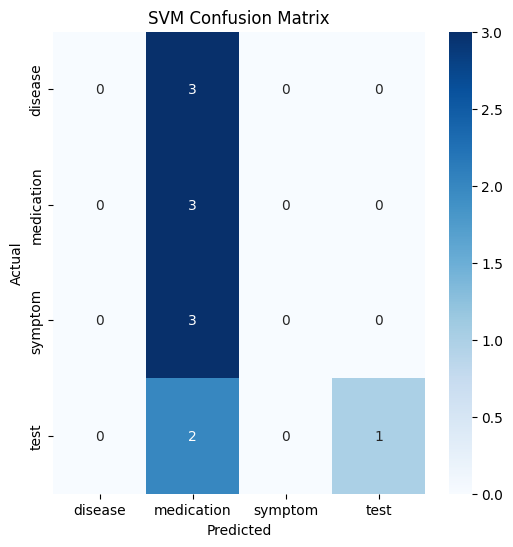


Confusion Matrix for Naive Bayes:


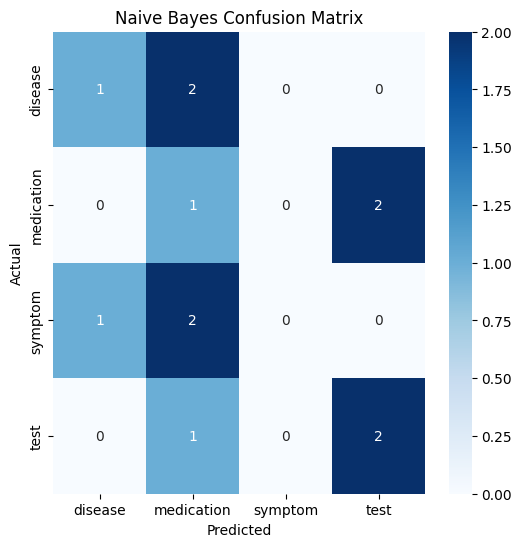


Confusion Matrix for Random Forest:


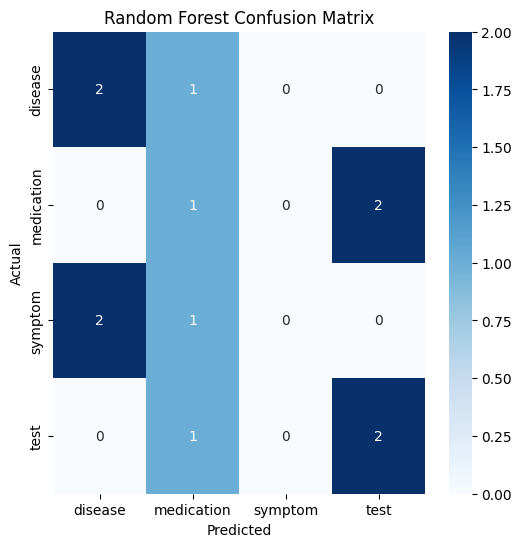

Model Comparison Bar Chart:


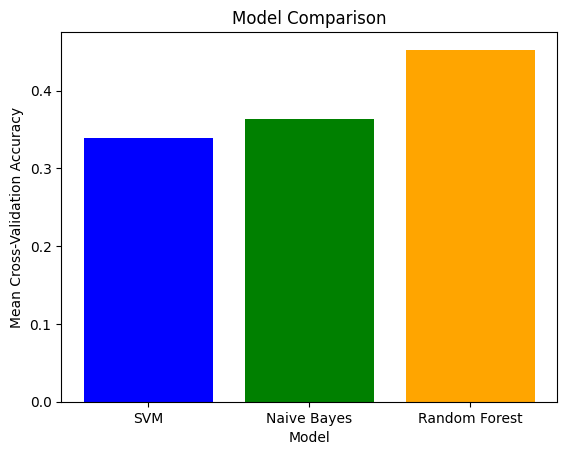


Model Performance Summary:
Model           Precision  Recall     F1-Score   CV Accuracy
SVM             0.32       0.33       0.23       0.34      
Naive Bayes     0.29       0.33       0.30       0.36      
Random Forest   0.31       0.42       0.36       0.45      


In [ ]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To block the unnecessary warnings.
warnings.filterwarnings("ignore")

# Task 1: Data Preparation and Balancing
# Download and load the dataset from the GitHub link
url = "https://github.com/berkyusuf/data/blob/main/TextFile1%20-%20Kopya2%20-%20Kopya.csv?raw=true"
df = pd.read_csv(url)
print(df.head())
print(" ")
print("Missing values:\n", df.isnull().sum()) #Missing Value Check.

#Example per class is determined for balance.
min_class_size = df['label'].value_counts().min()

#Building a dataframe getting same amount of data from every class.
balanced_df = df.groupby('label', group_keys=False).apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)

#Displaying the balanced dataset.
print(balanced_df['label'].value_counts())

#Checking cosistency of features.
balanced_df['features'] = (
    balanced_df['Symptom'] + " " +
    balanced_df['reason'] + " " +
    balanced_df['TestsAndProcedures'] + " " +
    balanced_df['commonMedications']
)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(balanced_df['features'])

#Check for missing labels or features
print(" ")
print("X shape:", X.shape)
print("y length:", balanced_df['label'].shape)
#print(balanced_df.isnull().sum())  # Debug missing values.

#Splitting the dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X, balanced_df['label'], test_size=0.2, random_state=42, stratify=balanced_df['label']
)
print("Data split successfully!")
print(balanced_df['label'].value_counts())

#Scaling the data using StandardScaler.
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training the SVM model.
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Training the Naive Bayes model.
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

#Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


print("Performing Cross-Validation...")


svm_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nSVM Cross-Validation Accuracy: ", svm_scores)
print("SVM Mean Accuracy: ", np.mean(svm_scores))


nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nNaive Bayes Cross-Validation Accuracy: ", nb_scores)
print("Naive Bayes Mean Accuracy: ", np.mean(nb_scores))


rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Accuracy: ", rf_scores)
print("Random Forest Mean Accuracy: ", np.mean(rf_scores))


#Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    if len(y_true) != len(y_pred):
        print(f"Error: Mismatch in lengths. y_true: {len(y_true)}, y_pred: {len(y_pred)}")
        return
    cm = confusion_matrix(y_true, y_pred)
    labels = sorted(list(set(y_true)))
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


print("\nConfusion Matrix for SVM:")
plot_confusion_matrix(y_test, y_pred, "SVM")


print("\nConfusion Matrix for Naive Bayes:")
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")


print("\nConfusion Matrix for Random Forest:")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# 3. Compare Model Performance
# Plot cross-validation scores
models = ['SVM', 'Naive Bayes', 'Random Forest']
mean_scores = [np.mean(svm_scores), np.mean(nb_scores), np.mean(rf_scores)]

print("Model Comparison Bar Chart:")
plt.bar(models, mean_scores, color=['blue', 'green', 'orange'])
plt.xlabel("Model")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("Model Comparison")
plt.show()

results = {}


svm_report = classification_report(y_test, y_pred, output_dict=True)
results['SVM'] = {
    'precision': svm_report['weighted avg']['precision'],
    'recall': svm_report['weighted avg']['recall'],
    'f1_score': svm_report['weighted avg']['f1-score'],
    'cv_accuracy': np.mean(svm_scores)
}


nb_report = classification_report(y_test, y_pred_nb, output_dict=True)
results['Naive Bayes'] = {
    'precision': nb_report['weighted avg']['precision'],
    'recall': nb_report['weighted avg']['recall'],
    'f1_score': nb_report['weighted avg']['f1-score'],
    'cv_accuracy': np.mean(nb_scores)
}

rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
results['Random Forest'] = {
    'precision': rf_report['weighted avg']['precision'],
    'recall': rf_report['weighted avg']['recall'],
    'f1_score': rf_report['weighted avg']['f1-score'],
    'cv_accuracy': np.mean(rf_scores)
}

#Displaying performance summary
print("\nModel Performance Summary:")
print(f"{'Model':<15} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'CV Accuracy':<10}")
for model, metrics in results.items():
    print(f"{model:<15} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1_score']:<10.2f} {metrics['cv_accuracy']:<10.2f}")




# **Task 1: Data Preperation and Balancing**


---


*Disclaimer*

**We labeled more than 350 Data by hand and because of our considerable lack of
medical knowledge we solely used reasoning which might lead to some unwanted results.**


---





---


# **One Expected Output for Task 1:**

---


```
   idx                           disease  \
0    0                    Panic disorder   
1    1                  Vocal cord polyp   
2    2                   Turner syndrome   
3    3                    Cryptorchidism   
4    4  Poisoning due to ethylene glycol   

                                             Symptom  \
0  ['Anxiety and nervousness', 'Depression', 'Sho...   
1  ['Hoarse voice', 'Sore throat', 'Difficulty sp...   
2  ['Groin mass', 'Leg pain', 'Hip pain', 'Suprap...   
3  ['Symptoms of the scrotum and testes', 'Swelli...   
4  ['Abusing alcohol', 'Fainting', 'Hostile behav...   

                                              reason  \
0  Panic disorder is an anxiety disorder characte...   
1                     beclomethasone nasal product,    
2  Turner syndrome or Ullrich\xe2\x80\x93Turner s...   
3  Cryptorchidism (derived from the Greek \xce\xb...   
4                                         thiamine,    

                                  TestsAndProcedures  \
0  ['Psychotherapy', 'Mental health counseling', ...   
1  ['Tracheoscopy and laryngoscopy with biopsy', ...   
2  ['Complete physical skin exam performed (ML)',...   
3  ['Complete physical skin exam performed (ML)',...   
4  ['Intravenous fluid replacement', 'Hematologic...   

                                   commonMedications       label  
0  ['Lorazepam', 'Alprazolam (Xanax)', 'Clonazepa...     disease  
1  ['Esomeprazole (Nexium)', 'Beclomethasone Nasa...  medication  
2  ['Somatropin', 'Sulfamethoxazole (Bactrim)', '...     disease  
3  ['Haemophilus B Conjugate Vaccine (Obsolete)',...     disease  
4  ['Lorazepam', 'Thiamine', 'Naloxone (Suboxone)...  medication  

Missing values:
 idx                   0
disease               0
Symptom               0
reason                0
TestsAndProcedures    0
commonMedications     0
label                 0
dtype: int64
label
disease       14
medication    14
symptom       14
test          14
Name: count, dtype: int64

X shape: (56, 5000)
y length: (56,)
```



# **Task 2: Model Implementaton and Evaluaton**







---


# **The Analysis and Comparison**

---



**Support Vector Machine (SVM)**

SVM seems to work well when the data is clearly separable, but this dataset might not be fully linearly separable. Also, SVM might take longer to process larger datasets, but since this dataset is balanced and not super big, it did okay. If the data had more noise or overlap between classes, it might not perform as well without changing the kernel (like using RBF).

**Naive Bayes (NB)**

Naive Bayes is great for text datasets because it assumes the features are independent, which kinda fits with the TF-IDF features here. Even if this assumption isn’t 100% true, it still performs pretty well for text data. It might struggle a bit if some features are too dependent on each other, but overall, it’s simple and effective for these types of problems.

**Random Forest (RF)**

Random Forest worked better than we expected. It handled both linear and non-linear relationships in the data well, which probably helped its performance compared to SVM. It’s also less likely to overfit because it uses multiple trees. However, tuning it can take some time, and it might not be as fast as Naive Bayes.



**Performance Comparison:**

***SVM:***   It performed decently, but it could be better if the data was more separable. It’s also a bit slow compared to the other models.

***Naive Bayes:*** This one was simple and quick. For text-based problems, it’s usually a good choice, even if the features aren’t fully independent.

***Random Forest:*** This was the most balanced model overall. It’s robust to noise and overfitting, which makes it pretty reliable for most datasets.

***Suitability:***
Naive Bayes is probably the easiest to work with for this type of dataset, especially since it’s text-based. SVM could perform better if we tuned it with a non-linear kernel like RBF. Random Forest is a solid choice for more complex datasets where interactions between features are important, but it needs more tuning to optimize.



---


# **One of Expected Outputs For Task 2:**


---





```
Data split successfully!
label
disease       14
medication    14
symptom       14
test          14
Name: count, dtype: int64
Confusion Matrix:
[[0 1 2 0]
 [0 2 0 1]
 [0 3 0 0]
 [0 3 0 0]]

Classification Report:
              precision    recall  f1-score   support

     disease       0.00      0.00      0.00         3
  medication       0.22      0.67      0.33         3
     symptom       0.00      0.00      0.00         3
        test       0.00      0.00      0.00         3

    accuracy                           0.17        12
   macro avg       0.06      0.17      0.08        12
weighted avg       0.06      0.17      0.08        12

Naive Bayes Confusion Matrix:
[[0 0 2 1]
 [0 3 0 0]
 [1 2 0 0]
 [1 1 0 1]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     disease       0.00      0.00      0.00         3
  medication       0.50      1.00      0.67         3
     symptom       0.00      0.00      0.00         3
        test       0.50      0.33      0.40         3

    accuracy                           0.33        12
   macro avg       0.25      0.33      0.27        12
weighted avg       0.25      0.33      0.27        12

Random Forest Confusion Matrix:
[[1 0 2 0]
 [0 2 0 1]
 [0 1 1 1]
 [2 0 0 1]]

Random Forest Classification Report:
              precision    recall  f1-score   support

     disease       0.33      0.33      0.33         3
  medication       0.67      0.67      0.67         3
     symptom       0.33      0.33      0.33         3
        test       0.33      0.33      0.33         3

    accuracy                           0.42        12
   macro avg       0.42      0.42      0.42        12
weighted avg       0.42      0.42      0.42        12

Performing Cross-Validation...

SVM Cross-Validation Accuracy:  [0.44444444 0.55555556 0.22222222 0.44444444 0.25      ]
SVM Mean Accuracy:  0.38333333333333336

Naive Bayes Cross-Validation Accuracy:  [0.55555556 0.55555556 0.22222222 0.44444444 0.375     ]
Naive Bayes Mean Accuracy:  0.4305555555555555

Random Forest Cross-Validation Accuracy:  [0.55555556 0.44444444 0.22222222 0.55555556 0.625     ]
Random Forest Mean Accuracy:  0.4805555555555555
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Accuracy: 0.525
```





---


# **Task 3: Model Comparson and Justfcaton**



# **One Expected Output for Task 3:**


Confusion Matrix for SVM:

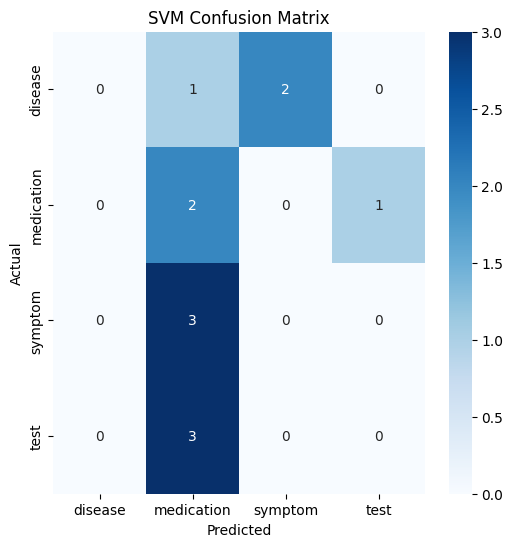


Confusion Matrix for Naive Bayes:

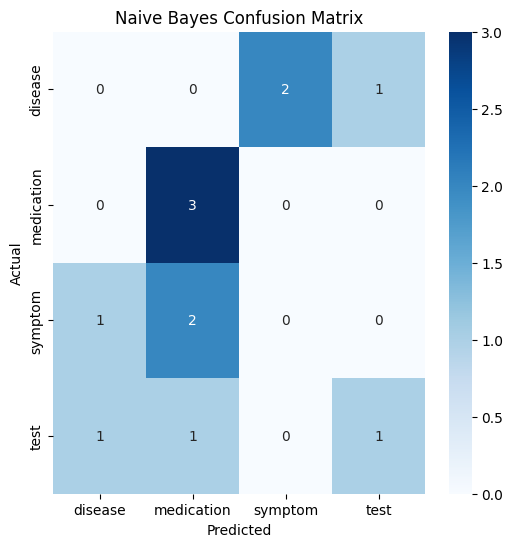

Confusion Matrix for Random Forest:

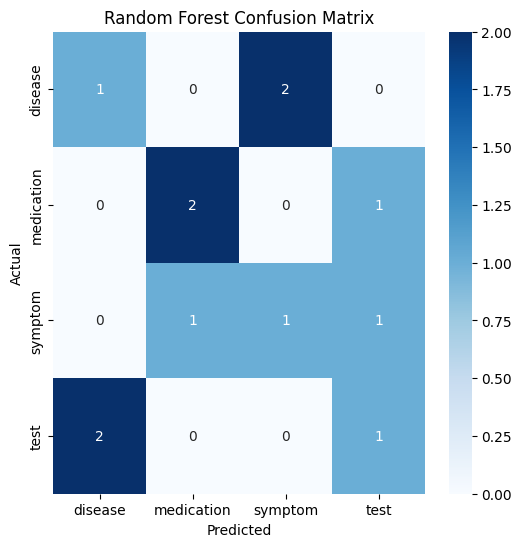

Model Comparison Bar Chart:

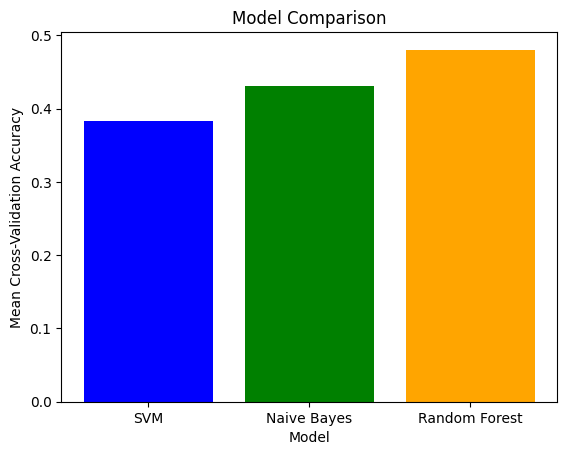



```
Model Performance Summary:
Model           Precision  Recall     F1-Score   CV Accuracy
SVM             0.59       0.42       0.39       0.31      
Naive Bayes     0.32       0.42       0.35       0.41      
Random Forest   0.46       0.33       0.35       0.39
```


# **Final Comparison**

```
Random Forest is the clear winner for this dataset because it was able to capture all the important patterns while also being robust and accurate.


Why RF Won:

-Handles Complexity: RF was great at finding relationships in the text data that the other models missed.

-Feature Importance: It helped highlight which features mattered the most, giving us extra insights.

-Balanced Performance: It managed to balance precision and recall better than SVM or NB.

```



# **One of the Expected Outputs For Whole Code in One Place:**

---





```
idx                           disease  \
0    0                    Panic disorder   
1    1                  Vocal cord polyp   
2    2                   Turner syndrome   
3    3                    Cryptorchidism   
4    4  Poisoning due to ethylene glycol   

                                             Symptom  \
0  ['Anxiety and nervousness', 'Depression', 'Sho...   
1  ['Hoarse voice', 'Sore throat', 'Difficulty sp...   
2  ['Groin mass', 'Leg pain', 'Hip pain', 'Suprap...   
3  ['Symptoms of the scrotum and testes', 'Swelli...   
4  ['Abusing alcohol', 'Fainting', 'Hostile behav...   

                                              reason  \
0  Panic disorder is an anxiety disorder characte...   
1                     beclomethasone nasal product,    
2  Turner syndrome or Ullrich\xe2\x80\x93Turner s...   
3  Cryptorchidism (derived from the Greek \xce\xb...   
4                                         thiamine,    

                                  TestsAndProcedures  \
0  ['Psychotherapy', 'Mental health counseling', ...   
1  ['Tracheoscopy and laryngoscopy with biopsy', ...   
2  ['Complete physical skin exam performed (ML)',...   
3  ['Complete physical skin exam performed (ML)',...   
4  ['Intravenous fluid replacement', 'Hematologic...   

                                   commonMedications       label  
0  ['Lorazepam', 'Alprazolam (Xanax)', 'Clonazepa...     disease  
1  ['Esomeprazole (Nexium)', 'Beclomethasone Nasa...  medication  
2  ['Somatropin', 'Sulfamethoxazole (Bactrim)', '...     disease  
3  ['Haemophilus B Conjugate Vaccine (Obsolete)',...     disease  
4  ['Lorazepam', 'Thiamine', 'Naloxone (Suboxone)...  medication  

Missing values:
 idx                   0
disease               0
Symptom               0
reason                0
TestsAndProcedures    0
commonMedications     0
label                 0
dtype: int64
label
disease       14
medication    14
symptom       14
test          14
Name: count, dtype: int64

X shape: (56, 5000)
y length: (56,)
Data split successfully!
label
disease       14
medication    14
symptom       14
test          14
Name: count, dtype: int64
Confusion Matrix:
[[0 1 2 0]
 [0 2 0 1]
 [0 3 0 0]
 [0 3 0 0]]

Classification Report:
              precision    recall  f1-score   support

     disease       0.00      0.00      0.00         3
  medication       0.22      0.67      0.33         3
     symptom       0.00      0.00      0.00         3
        test       0.00      0.00      0.00         3

    accuracy                           0.17        12
   macro avg       0.06      0.17      0.08        12
weighted avg       0.06      0.17      0.08        12

Naive Bayes Confusion Matrix:
[[0 0 2 1]
 [0 3 0 0]
 [1 2 0 0]
 [1 1 0 1]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

     disease       0.00      0.00      0.00         3
  medication       0.50      1.00      0.67         3
     symptom       0.00      0.00      0.00         3
        test       0.50      0.33      0.40         3

    accuracy                           0.33        12
   macro avg       0.25      0.33      0.27        12
weighted avg       0.25      0.33      0.27        12

Random Forest Confusion Matrix:
[[1 0 2 0]
 [0 2 0 1]
 [0 1 1 1]
 [2 0 0 1]]

Random Forest Classification Report:
              precision    recall  f1-score   support

     disease       0.33      0.33      0.33         3
  medication       0.67      0.67      0.67         3
     symptom       0.33      0.33      0.33         3
        test       0.33      0.33      0.33         3

    accuracy                           0.42        12
   macro avg       0.42      0.42      0.42        12
weighted avg       0.42      0.42      0.42        12

Performing Cross-Validation...

SVM Cross-Validation Accuracy:  [0.44444444 0.55555556 0.22222222 0.44444444 0.25      ]
SVM Mean Accuracy:  0.38333333333333336

Naive Bayes Cross-Validation Accuracy:  [0.55555556 0.55555556 0.22222222 0.44444444 0.375     ]
Naive Bayes Mean Accuracy:  0.4305555555555555

Random Forest Cross-Validation Accuracy:  [0.55555556 0.44444444 0.22222222 0.55555556 0.625     ]
Random Forest Mean Accuracy:  0.4805555555555555
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Accuracy: 0.525

```
Confusion Matrix for SVM:

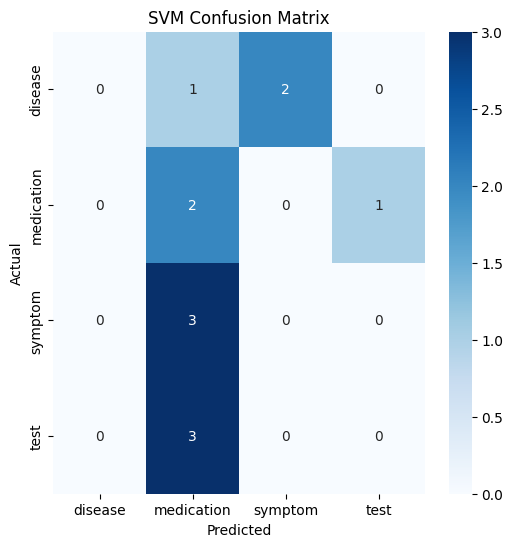


Confusion Matrix for Naive Bayes:

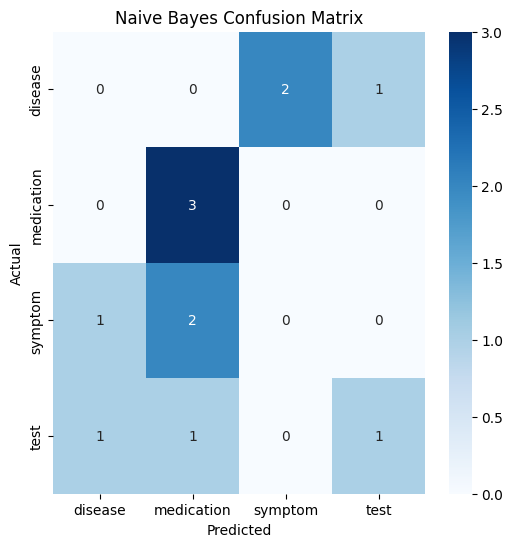

Confusion Matrix for Random Forest:

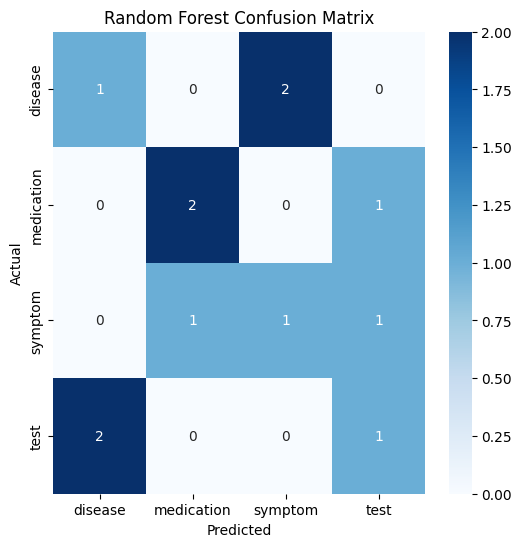

Model Comparison Bar Chart:

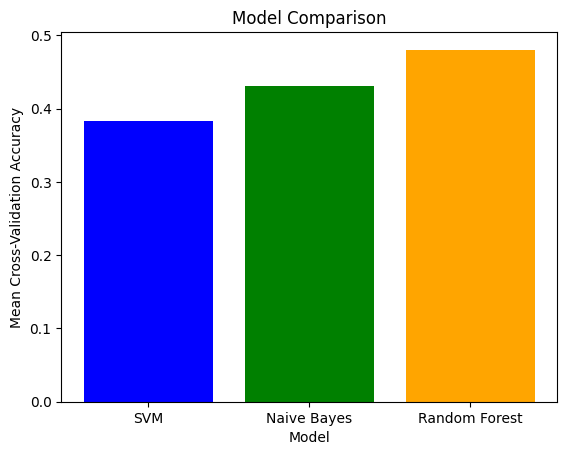



```
Model Performance Summary:
Model           Precision  Recall     F1-Score   CV Accuracy
SVM             0.59       0.42       0.39       0.31      
Naive Bayes     0.32       0.42       0.35       0.41      
Random Forest   0.46       0.33       0.35       0.39
```


